In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)

# preprocessing
import re
import string 
import itertools # for flattening

# nltk library
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.util import ngrams
from nltk.util import ngrams

from wordcloud import WordCloud

nltk.download('punkt', quiet=True)
nltk.download('stopwords')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

# sklearn library 
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer


from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pyLDAvis.sklearn

import pickle
from pprint import pprint

# Gensim package for topic modeling

import gensim
from gensim import corpora
from gensim import models
from gensim.models import LdaModel, LdaMulticore
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
import matplotlib.colors as mcolors
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\jimmy\anaconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's docu

In [2]:
# preprocessing dataframe

df = pd.read_pickle(r"preprocessed_final_df.pkl")
df = df.drop(["review_preprocessed", "joined_review_preprocessed", "steamid", "language"], axis = 1)
df

,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,review,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count
0,236,22,5650,0,The best game of all time. Don't believe me? P...,1,0,0,0.000000,0
1,78,2,2087,1681,i like that it is an open world game that you ...,1,0,0,0.000000,0
2,33,5,523,518,"I fucking love this game, its one of my childh...",1,0,0,0.000000,0
3,38,2,1142,671,All time great!,1,0,0,0.000000,0
4,69,13,266,48,Uras,1,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
194030,343,7,3710,0,Loved this game when on ios platform. happy to...,1,7,2,0.398308,0
194031,168,27,971,0,"Named my first vault vault 69, the other vault...",1,6,34,0.277916,0
194032,440,19,66,0,A F2P pile of shit that is laced in microtrans...,0,44,3,0.290692,16
194033,197,12,1217,0,Finally! Now I can put my nvidia geforce gtx 1...,1,1,5,0.000000,0


In [3]:
tokenizer = RegexpTokenizer(r"(?u)\w{4,}")
stopwords_list = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

def preprocess_text(text, tokenizer, stopwords_list, lemmatizer):

#   Standardize case (lowercase the text)
    lower_case = text.lower()
    
#   Remove hashtags, urls, mentions and strip whitespace
    tweet_lower = re.sub(r"@[a-z0-9_]+|#[a-z0-9_]+|http\S+", "", lower_case).strip().replace("\r", "").replace("\n", "").replace("\t", "")
    
#   Tokenize text using `tokenizer`
    tokenized = tokenizer.tokenize(tweet_lower)
    
#   Remove stopwords using `stopwords_list`
    token_stopped_list = [word for word in tokenized if (word.lower() not in stopwords_list) & (word not in ["quot", "good", "like", "know", "go", "much", "back", "really", "well", "would", "game", "fallout", "still", "time", "games", "even", "bethesda", "want", "make", "feel", "pero", "para", "make", "look", "hour", "played", "thing", "need", "better", "juego", "como", "este", "todo", "tiene", "also"])]

#   Remove non-english text
    non_english_pattern = "[^a-zA-Z\s]+"
    filtered_words = []
    for word in token_stopped_list:
        match = re.search(non_english_pattern, word)
        if not match:
            filtered_words.append(word)
        
#   Lemmatize the tokenized text using 'lemmatizer'
    lemmatize = [lemmatizer.lemmatize(text) for text in filtered_words]

#   Return the preprocessed text
    return lemmatize


<>:20: DeprecationWarning: invalid escape sequence \s
<>:20: DeprecationWarning: invalid escape sequence \s
C:\Users\jimmy\AppData\Local\Temp\ipykernel_5940\1836100965.py:20: DeprecationWarning: invalid escape sequence \s
  non_english_pattern = "[^a-zA-Z\s]+"


In [4]:
df["review_preprocessed"] = df["review"].apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, lemmatizer))

In [5]:
df

,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,review,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,review_preprocessed
0,236,22,5650,0,The best game of all time. Don't believe me? P...,1,0,0,0.000000,0,"[best, believe, play, find]"
1,78,2,2087,1681,i like that it is an open world game that you ...,1,0,0,0.000000,0,"[open, world, day]"
2,33,5,523,518,"I fucking love this game, its one of my childh...",1,0,0,0.000000,0,"[fucking, love, childhood, favourite, although..."
3,38,2,1142,671,All time great!,1,0,0,0.000000,0,[great]
4,69,13,266,48,Uras,1,0,0,0.000000,0,[uras]
...,...,...,...,...,...,...,...,...,...,...,...
194030,343,7,3710,0,Loved this game when on ios platform. happy to...,1,7,2,0.398308,0,"[loved, platform, happy, play]"
194031,168,27,971,0,"Named my first vault vault 69, the other vault...",1,6,34,0.277916,0,"[named, first, vault, vault, vault, gave, ever..."
194032,440,19,66,0,A F2P pile of shit that is laced in microtrans...,0,44,3,0.290692,16,"[pile, shit, laced, microtransactions, belong,..."
194033,197,12,1217,0,Finally! Now I can put my nvidia geforce gtx 1...,1,1,5,0.000000,0,"[finally, nvidia, geforce]"


In [6]:
# creating bigrams using phrases models

bigram = gensim.models.phrases.Phrases(df["review_preprocessed"], min_count = 3, threshold = 10)

In [7]:
# create dictionary of tokenized words 

dictionary = corpora.Dictionary(bigram[df["review_preprocessed"]])

dictionary.filter_extremes(no_below = 1000, no_above = 0.95)

In [8]:
dictionary1=dictionary.token2id

In [9]:
keys=[]
for key in dictionary1.keys():
    keys.append(key)

In [10]:
keys

['best',
 'find',
 'play',
 'day',
 'open_world',
 'although',
 'building',
 'combat',
 'definitely',
 'fucking',
 'love',
 'opinion',
 'story',
 'great',
 'used',
 'think',
 'cant',
 'cool',
 'please',
 'problem',
 'recommend',
 'something',
 'window',
 'suck',
 'buggy',
 'explore',
 'mechanic',
 'overall',
 'funny',
 'vega',
 'actually',
 'playing',
 'series',
 'working',
 'broken',
 'crash',
 'fixed',
 'keep',
 'never',
 'amount',
 'running',
 'hate',
 'another',
 'easy',
 'enjoy',
 'open',
 'wasteland',
 'almost',
 'second',
 'shit',
 'bug',
 'interesting',
 'version',
 'shooter',
 'complete',
 'engine',
 'enough',
 'graphic',
 'hold',
 'load',
 'mean',
 'time',
 'year',
 'already',
 'work',
 'done',
 'le',
 'perfect',
 'idea',
 'always',
 'every',
 'fact',
 'gun',
 'reason',
 'sure',
 'world',
 'computer',
 'dont',
 'hour',
 'sale',
 'sometimes',
 'spent',
 'type',
 'decent',
 'exploration',
 'despite',
 'past',
 'using',
 'kinda',
 'nice',
 'classic',
 'started',
 'vault',
 'amaz

In [11]:
# creating the corpus (bag of words)

corpus = [dictionary.doc2bow(doc) for doc in bigram[df["review_preprocessed"]]]
corpus

[[(0, 1), (1, 1), (2, 1)],
 [(3, 1), (4, 1)],
 [(2, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(13, 1)],
 [],
 [(2, 2), (13, 1), (14, 1)],
 [],
 [(15, 1)],
 [(2, 1)],
 [],
 [(2, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)],
 [(23, 1)],
 [(24, 1), (25, 1), (26, 1), (27, 1)],
 [(28, 1)],
 [(29, 1)],
 [(30, 1), (31, 2), (32, 1)],
 [(33, 1)],
 [(12, 1), (13, 1), (31, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1)],
 [(41, 1)],
 [(22, 2), (35, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1)],
 [],
 [(10, 1), (47, 1), (48, 1), (49, 1)],
 [(29, 2), (50, 1), (51, 1), (52, 1)],
 [(38, 1), (53, 1)],
 [(24, 1),
  (50, 1),
  (54, 1),
  (55, 1),
  (56, 2),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 2)],
 [(63, 1)],
 [(13, 1)],
 [],
 [(64, 1)],
 [],
 [(10, 1)],
 [(2, 1), (29, 1), (35, 1), (65, 1), (66, 1), (67, 1)],
 [(11, 1), (53, 1), (68, 1)],
 [],
 [],
 [(38, 1), (69, 1)],
 [],
 [(20, 1)],
 [(22, 2),
  (

In [12]:
from gensim.matutils import corpus2csc
from gensim.matutils import Sparse2Corpus
from gensim.matutils import corpus2dense

# Convert the corpus to a sparse matrix representation
# gen_corp = [dictionary.doc2bow(doc) for doc in corpus]
# sparse_corp = corpus2csc(gen_corp)


# dense_corp = pd.DataFrame(corpus2dense(Sparse2Corpus(sparse_corp), num_terms = len(dictionary.token2id)),
#                           columns = list(dictionary.values()))
# dense_corp = pd.DataFrame(gen_corp, columns = list(dictionary.values()))

In [13]:
# Convert the corpus to a sparse matrix representation
# gen_corp = [dictionary.doc2bow(doc) for doc in corpus]
from gensim.matutils import corpus2csc
sparse_corp = corpus2csc(corpus)
dense_corp = np.array(sparse_corp.todense())

In [14]:
dense_corp

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 3.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 2.]])

In [15]:
len(dense_corp)

313

In [16]:
new_df = pd.DataFrame(dense_corp).transpose()

In [17]:
new_df.columns=keys

In [18]:
new_df

,best,find,play,day,open_world,although,building,combat,definitely,fucking,...,room,story_line,immersive,obsidian,settlement,shelter,event,iron,mobile,dweller
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194026,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df

,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,review,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,review_preprocessed
0,236,22,5650,0,The best game of all time. Don't believe me? P...,1,0,0,0.000000,0,"[best, believe, play, find]"
1,78,2,2087,1681,i like that it is an open world game that you ...,1,0,0,0.000000,0,"[open, world, day]"
2,33,5,523,518,"I fucking love this game, its one of my childh...",1,0,0,0.000000,0,"[fucking, love, childhood, favourite, although..."
3,38,2,1142,671,All time great!,1,0,0,0.000000,0,[great]
4,69,13,266,48,Uras,1,0,0,0.000000,0,[uras]
...,...,...,...,...,...,...,...,...,...,...,...
194030,343,7,3710,0,Loved this game when on ios platform. happy to...,1,7,2,0.398308,0,"[loved, platform, happy, play]"
194031,168,27,971,0,"Named my first vault vault 69, the other vault...",1,6,34,0.277916,0,"[named, first, vault, vault, vault, gave, ever..."
194032,440,19,66,0,A F2P pile of shit that is laced in microtrans...,0,44,3,0.290692,16,"[pile, shit, laced, microtransactions, belong,..."
194033,197,12,1217,0,Finally! Now I can put my nvidia geforce gtx 1...,1,1,5,0.000000,0,"[finally, nvidia, geforce]"


In [20]:
orig_df = df.drop(["review", "review_preprocessed"], axis = 1).reset_index()
orig_df

,index,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count
0,0,236,22,5650,0,1,0,0,0.000000,0
1,1,78,2,2087,1681,1,0,0,0.000000,0
2,2,33,5,523,518,1,0,0,0.000000,0
3,3,38,2,1142,671,1,0,0,0.000000,0
4,4,69,13,266,48,1,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
194026,194030,343,7,3710,0,1,7,2,0.398308,0
194027,194031,168,27,971,0,1,6,34,0.277916,0
194028,194032,440,19,66,0,0,44,3,0.290692,16
194029,194033,197,12,1217,0,1,1,5,0.000000,0


In [21]:
# concatenating orig_df and new_df 

concat_df = pd.concat([orig_df, new_df], axis = 1)

In [22]:
concat_df = concat_df.drop("index", axis = 1)

In [23]:
concat_df

,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,best,...,room,story_line,immersive,obsidian,settlement,shelter,event,iron,mobile,dweller
0,236,22,5650,0,1,0,0,0.000000,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,78,2,2087,1681,1,0,0,0.000000,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33,5,523,518,1,0,0,0.000000,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38,2,1142,671,1,0,0,0.000000,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,69,13,266,48,1,0,0,0.000000,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194026,343,7,3710,0,1,7,2,0.398308,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194027,168,27,971,0,1,6,34,0.277916,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194028,440,19,66,0,0,44,3,0.290692,16,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194029,197,12,1217,0,1,1,5,0.000000,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modeling

In [24]:
# train test split 
X = concat_df.drop(["voted_up"], axis = 1)
y = concat_df["voted_up"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.33, 
                                                    random_state = 42)

In [25]:
# selecting numerical columns

num_cols = X_train.select_dtypes(['int', 'float']).columns

In [26]:
# numeric pipeline
from sklearn.preprocessing import FunctionTransformer

numeric_pipeline = Pipeline([ 
        ("scaler", MinMaxScaler())
])

# column transformer

ct = ColumnTransformer(
    [("numpipe", numeric_pipeline, num_cols)])

## Multinomial Naive Bayes

In [27]:
pipe1 = Pipeline([
    ('preprocessing', ct),
    ('smote', SMOTE()),
    ('classifier', MultinomialNB())
])
pipe1

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['num_games_owned', 'num_reviews', 'playtime_forever',
       'playtime_last_two_weeks', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'best', 'find',
       ...
       'room', 'story_line', 'immersive', 'obsidian', 'settlement', 'shelter',
       'event', 'iron', 'mobile', 'dweller'],
      dtype='object', length=321))])),
                ('smote', SMOTE()), ('classifier', MultinomialNB())])

In [28]:
# fit training set 

pipe1.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['num_games_owned', 'num_reviews', 'playtime_forever',
       'playtime_last_two_weeks', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'best', 'find',
       ...
       'room', 'story_line', 'immersive', 'obsidian', 'settlement', 'shelter',
       'event', 'iron', 'mobile', 'dweller'],
      dtype='object', length=321))])),
                ('smote', SMOTE()), ('classifier', MultinomialNB())])

In [29]:
# test set prediction 
# pipe1_y_pred = pipe1.predict(X_test)

# metric scores 
# print("Accuracy Score:", pipe1.score(X_test, y_test))
# print("Recall Score:", recall_score(y_test, pipe1_y_pred))
# print("Precision Score:", precision_score(y_test, pipe1_y_pred))
# print("F1 Score:", f1_score(y_test, pipe1_y_pred))

# classification report
# print("Model 1 Classification Report: \n", classification_report(y_test, pipe1_y_pred))


# Accuracy Score: 0.7667536037231966
# Recall Score: 0.7644487359550561
# Precision Score: 0.9663123321719447
# F1 Score: 0.8536085707844464
# Model 1 Classification Report: 
#                precision    recall  f1-score   support

#            0       0.29      0.79      0.43      7071
#            1       0.97      0.76      0.85     56960

#     accuracy                           0.77     64031
#    macro avg       0.63      0.77      0.64     64031
# weighted avg       0.89      0.77      0.81     64031

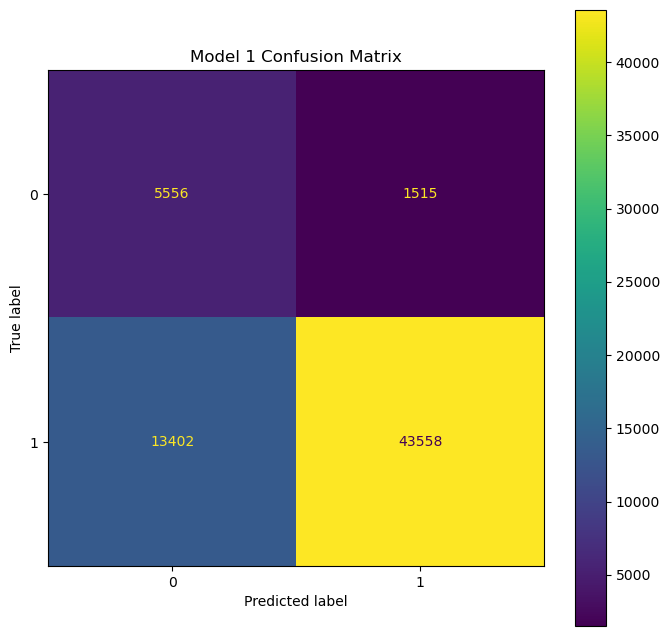

In [30]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Model 1 Confusion Matrix")
plot_confusion_matrix(pipe1, X_test, y_test, ax = ax)
plt.show();

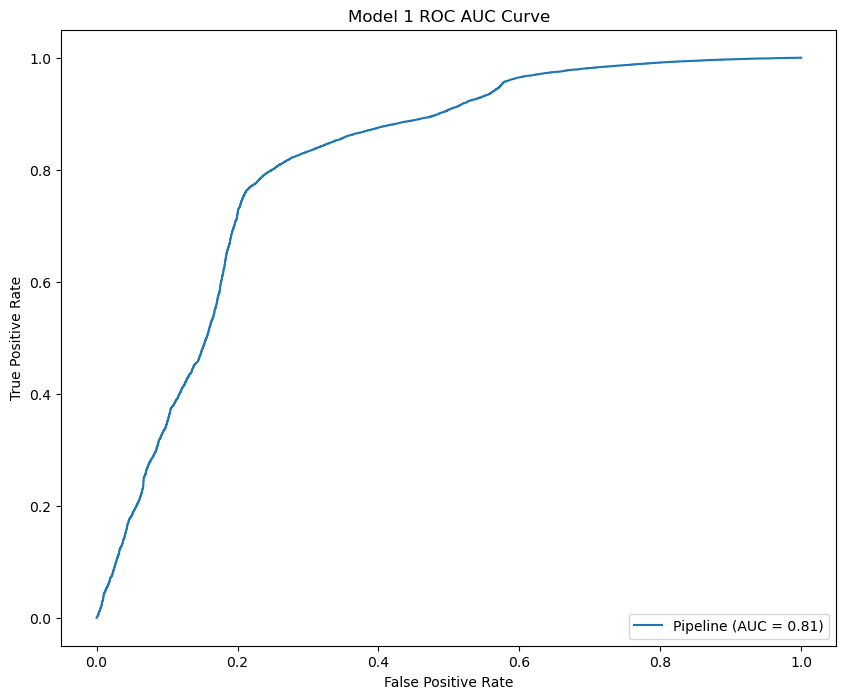

In [31]:
# plotting the AUC Curve 

fig, ax = plt.subplots(figsize = (10, 8))
plot_roc_curve(pipe1, X_test, y_test, ax = ax)
ax.set_title("Model 1 ROC AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show();

## Decision Trees

In [32]:
pipe2 = Pipeline([
    ('preprocessing', ct),
    ('smote', SMOTE()),
    ('tree', DecisionTreeClassifier(criterion = "gini", max_depth = 12, min_samples_leaf = 1, min_samples_split = 3))
])
pipe2

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['num_games_owned', 'num_reviews', 'playtime_forever',
       'playtime_last_two_weeks', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'best', 'find',
       ...
       'room', 'story_line', 'immersive', 'obsidian', 'settlement', 'shelter',
       'event', 'iron', 'mobile', 'dweller'],
      dtype='object', length=321))])),
                ('smote', SMOTE()),
                ('tree',
                 DecisionTreeClassifier(max_depth=12, min_samples_split=3))])

In [33]:
# parameter grid
# grid = [{
#     "tree__criterion": ["gini", "entropy"], 
#     "tree__max_depth": [12, 15, 17], 
#     "tree__min_samples_split": [1, 2, 3],
#     "tree__min_samples_leaf": [1, 2, 3]
# }]

# grid search
# gs_pipe2 = GridSearchCV(estimator = pipe2, param_grid = grid, scoring = "accuracy", cv = 3)

# gs_pipe2.fit(X_train, y_train)

# best params
# gs_pipe2.best_params_
# {'tree__criterion': 'gini',
#  'tree__max_depth': 12,
#  'tree__min_samples_leaf': 1,
#  'tree__min_samples_split': 3}

In [34]:
# fit training set 

pipe2.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['num_games_owned', 'num_reviews', 'playtime_forever',
       'playtime_last_two_weeks', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'best', 'find',
       ...
       'room', 'story_line', 'immersive', 'obsidian', 'settlement', 'shelter',
       'event', 'iron', 'mobile', 'dweller'],
      dtype='object', length=321))])),
                ('smote', SMOTE()),
                ('tree',
                 DecisionTreeClassifier(max_depth=12, min_samples_split=3))])

In [35]:
# test set prediction 
# pipe2_y_pred = pipe2.predict(X_test)

# metric scores 
# print("Accuracy Score:", pipe2.score(X_test, y_test))
# print("Recall Score:", recall_score(y_test, pipe2_y_pred))
# print("Precision Score:", precision_score(y_test, pipe2_y_pred))
# print("F1 Score:", f1_score(y_test, pipe2_y_pred))

# classification report
# print("Model 1 Classification Report: \n", classification_report(y_test, pipe2_y_pred))


# Accuracy Score: 0.8878043447705017
# Recall Score: 0.9225948033707865
# Precision Score: 0.9498427502440082
# F1 Score: 0.9360205190317582
# Model 1 Classification Report: 
#                precision    recall  f1-score   support

#            0       0.49      0.61      0.54      7071
#            1       0.95      0.92      0.94     56960

#     accuracy                           0.89     64031
#    macro avg       0.72      0.77      0.74     64031
# weighted avg       0.90      0.89      0.89     64031

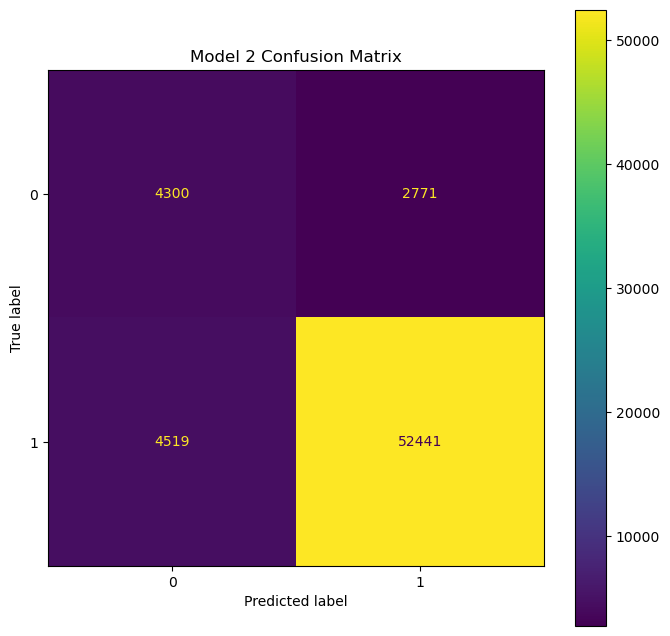

In [36]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Model 2 Confusion Matrix")
plot_confusion_matrix(pipe2, X_test, y_test, ax = ax)
plt.show();

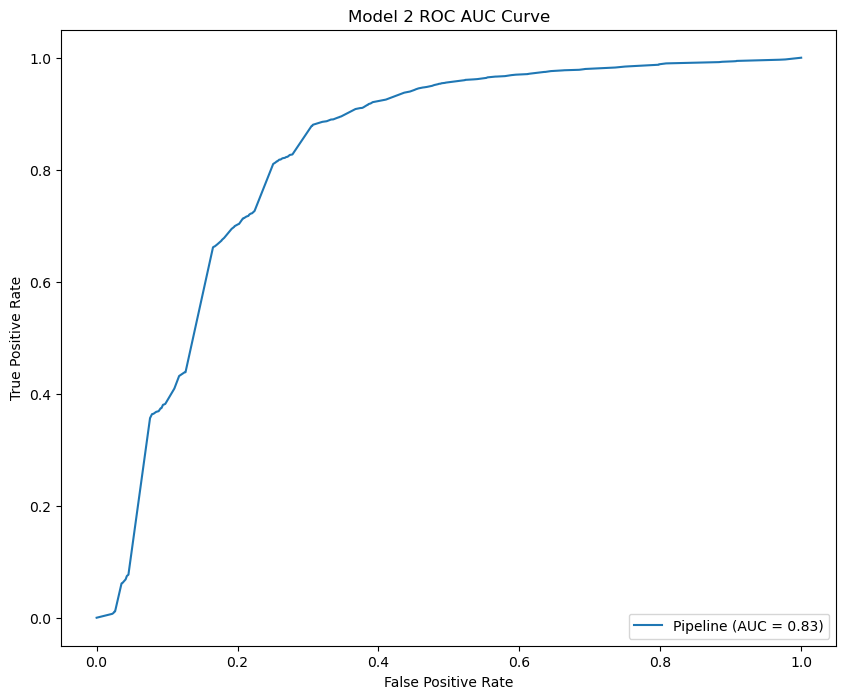

In [37]:
# plotting the AUC Curve 

fig, ax = plt.subplots(figsize = (10, 8))
plot_roc_curve(pipe2, X_test, y_test, ax = ax)
ax.set_title("Model 2 ROC AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show();

## Random Forest

In [38]:
pipe3 = Pipeline([
    ("preprocessing", ct),
    ("smote", SMOTE()), 
    ("rfc", RandomForestClassifier(criterion = "gini", max_depth = 15, min_samples_leaf = 5, n_estimators = 200))
])
pipe3

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['num_games_owned', 'num_reviews', 'playtime_forever',
       'playtime_last_two_weeks', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'best', 'find',
       ...
       'room', 'story_line', 'immersive', 'obsidian', 'settlement', 'shelter',
       'event', 'iron', 'mobile', 'dweller'],
      dtype='object', length=321))])),
                ('smote', SMOTE()),
                ('rfc',
                 RandomForestClassifier(max_depth=15, min_samples_leaf=5,
                                        n_estimators=200))])

In [39]:
# parameter grid
# grid = [{
#     "rfc__criterion": ["gini", "entropy"], 
#     "rfc__max_depth": [8, 12, 15], 
#     "rfc__n_estimators": [50, 150, 200],
#     "rfc__min_samples_leaf": [5, 20, 50]
# }]

# Grid Search
# gs_pipe3 = GridSearchCV(estimator = pipe3, param_grid = grid, scoring = "accuracy")

# gs_pipe3.fit(X_train, y_train)

# best params
# gs_pipe3.best_params_

# {'rfc__criterion': 'gini',
#  'rfc__max_depth': 15,
#  'rfc__min_samples_leaf': 5,
#  'rfc__n_estimators': 200}

In [40]:
# fit training set 

pipe3.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['num_games_owned', 'num_reviews', 'playtime_forever',
       'playtime_last_two_weeks', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'best', 'find',
       ...
       'room', 'story_line', 'immersive', 'obsidian', 'settlement', 'shelter',
       'event', 'iron', 'mobile', 'dweller'],
      dtype='object', length=321))])),
                ('smote', SMOTE()),
                ('rfc',
                 RandomForestClassifier(max_depth=15, min_samples_leaf=5,
                                        n_estimators=200))])

In [41]:
# test set prediction 
pipe3_y_pred = pipe3.predict(X_test)

# metric scores 
print("Accuracy Score:", pipe3.score(X_test, y_test))
print("Recall Score:", recall_score(y_test, pipe3_y_pred))
print("Precision Score:", precision_score(y_test, pipe3_y_pred))
print("F1 Score:", f1_score(y_test, pipe3_y_pred))

# classification report
print("Model 3 Classification Report: \n", classification_report(y_test, pipe3_y_pred))

Accuracy Score: 0.8606612422108041
Recall Score: 0.8824438202247191
Precision Score: 0.9575919222709087
F1 Score: 0.9184833257195065
Model 3 Classification Report: 
               precision    recall  f1-score   support

           0       0.42      0.69      0.52      7071
           1       0.96      0.88      0.92     56960

    accuracy                           0.86     64031
   macro avg       0.69      0.78      0.72     64031
weighted avg       0.90      0.86      0.87     64031



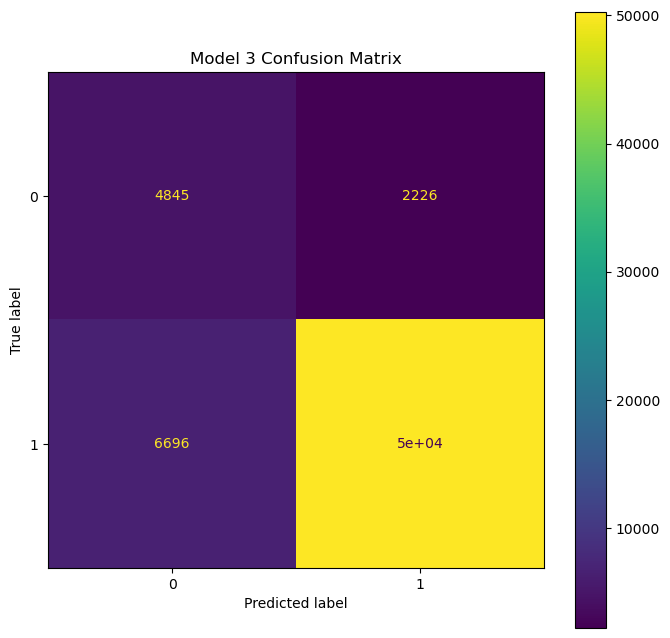

In [42]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Model 3 Confusion Matrix")
plot_confusion_matrix(pipe3, X_test, y_test, ax = ax)
plt.show();

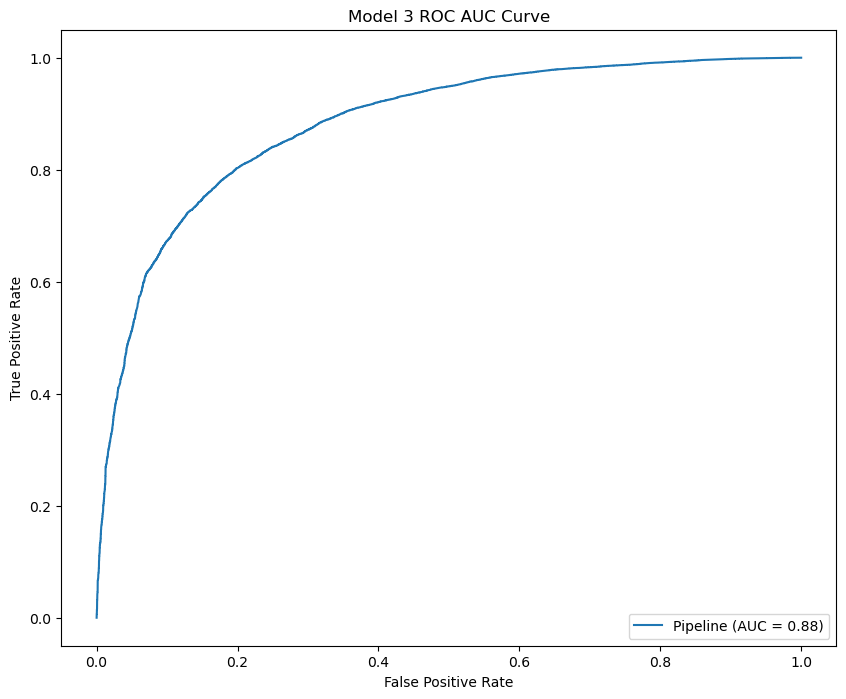

In [43]:
# plotting the AUC Curve 

fig, ax = plt.subplots(figsize = (10, 8))
plot_roc_curve(pipe3, X_test, y_test, ax = ax)
ax.set_title("Model 3 ROC AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show();

## XGBOOST

In [44]:
pipe4 = Pipeline([
    ("preprocessing", ct),
    ("smote", SMOTE()), 
    ("xgb", XGBClassifier(random_state = 42, 
                          gamma = 1.5,
                          learning_rate = 0.2,
                          max_depth = 10,
                          min_child_weight = 1, 
                          n_estimators = 100))
])
pipe4

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['num_games_owned', 'num_reviews', 'playtime_forever',
       'playtime_last_two_weeks', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'best', 'find',
       ...
       'room', 'story_line', 'immersive', 'obsidian', 'settlement', 'shelter',...
                               gamma=1.5, gpu_id=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_delta_step=None, max_depth=10,
                               min_child_weight=1, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_par

In [45]:
# parameter grid
# grid = [{
#     "xgb__gamma": [1.5, 2, 2.5], 
#     "xgb__learning_rate": [0.2, 0.4, 0.5], 
#     "xgb__max_depth": [11, 13, 15],
#     "xgb__min_child_weight": [1, 2, 3], 
#     "xgb__n_estimators": [75, 100, 150]
# }]

# grid search
# gs_pipe4 = GridSearchCV(estimator = pipe4, param_grid = grid, scoring = "accuracy")

# gs_pipe4.fit(X_train, y_train)

# best params
# gs_pipe4.best_params_

In [46]:
# fit training set 

pipe4.fit(X_train, y_train)

[07:10:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['num_games_owned', 'num_reviews', 'playtime_forever',
       'playtime_last_two_weeks', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'best', 'find',
       ...
       'room', 'story_line', 'immersive', 'obsidian', 'settlement', 'shelter',...
                               gamma=1.5, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=10,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=16, num_parallel_tre

In [47]:
# test set prediction 
pipe4_y_pred = pipe4.predict(X_test)

# metric scores 
print("Accuracy Score:", pipe4.score(X_test, y_test))
print("Recall Score:", recall_score(y_test, pipe4_y_pred))
print("Precision Score:", precision_score(y_test, pipe4_y_pred))
print("F1 Score:", f1_score(y_test, pipe4_y_pred))

# classification report
print("Model 4 Classification Report: \n", classification_report(y_test, pipe4_y_pred))

Accuracy Score: 0.9239899423716638
Recall Score: 0.9674683988764045
Precision Score: 0.948142667882521
F1 Score: 0.9577080491132334
Model 4 Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.57      0.63      7071
           1       0.95      0.97      0.96     56960

    accuracy                           0.92     64031
   macro avg       0.82      0.77      0.79     64031
weighted avg       0.92      0.92      0.92     64031



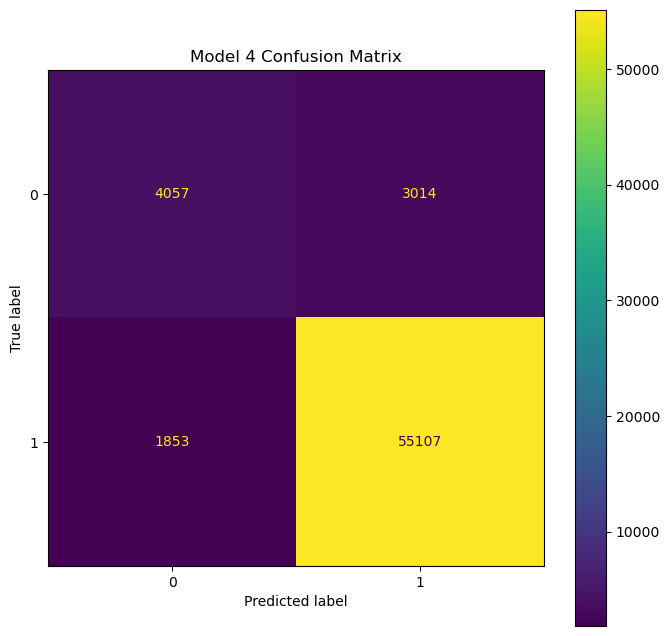

In [48]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Model 4 Confusion Matrix")
plot_confusion_matrix(pipe4, X_test, y_test, ax = ax)
plt.show();

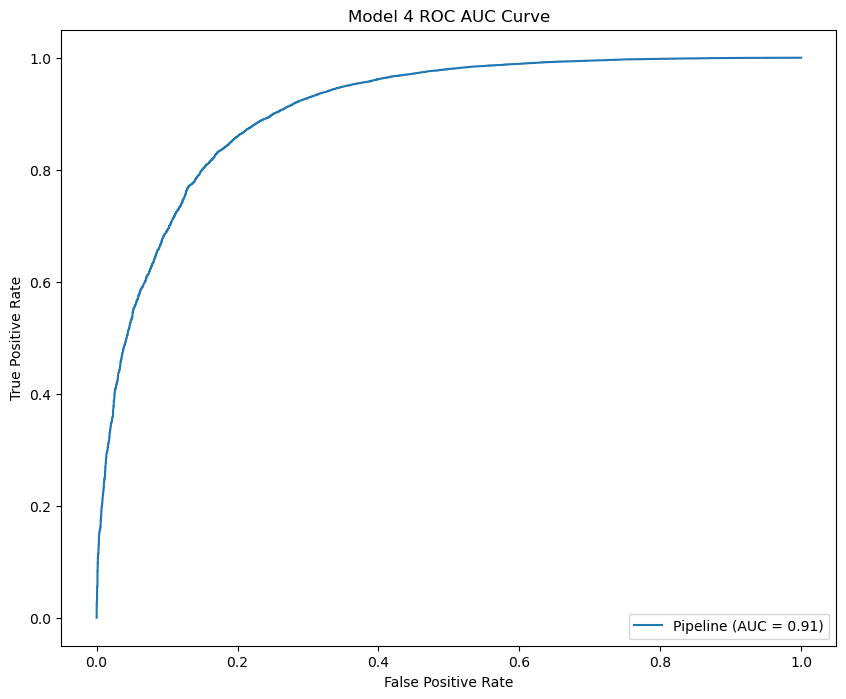

In [49]:
# plotting the AUC Curve 

fig, ax = plt.subplots(figsize = (10, 8))
plot_roc_curve(pipe4, X_test, y_test, ax = ax)
ax.set_title("Model 4 ROC AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show();

## Logistic Regression

In [50]:
pipe5 = Pipeline([
    ("preprocessing", ct),
    ("smote", SMOTE()), 
    ("logreg", LogisticRegression(C = 1, fit_intercept = False))
])
pipe5

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['num_games_owned', 'num_reviews', 'playtime_forever',
       'playtime_last_two_weeks', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'best', 'find',
       ...
       'room', 'story_line', 'immersive', 'obsidian', 'settlement', 'shelter',
       'event', 'iron', 'mobile', 'dweller'],
      dtype='object', length=321))])),
                ('smote', SMOTE()),
                ('logreg', LogisticRegression(C=1, fit_intercept=False))])

In [51]:
# fit training set 

pipe5.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['num_games_owned', 'num_reviews', 'playtime_forever',
       'playtime_last_two_weeks', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'best', 'find',
       ...
       'room', 'story_line', 'immersive', 'obsidian', 'settlement', 'shelter',
       'event', 'iron', 'mobile', 'dweller'],
      dtype='object', length=321))])),
                ('smote', SMOTE()),
                ('logreg', LogisticRegression(C=1, fit_intercept=False))])

In [52]:
# test set prediction 
pipe5_y_pred = pipe5.predict(X_test)

# metric scores 
print("Accuracy Score:", pipe5.score(X_test, y_test))
print("Recall Score:", recall_score(y_test, pipe5_y_pred))
print("Precision Score:", precision_score(y_test, pipe5_y_pred))
print("F1 Score:", f1_score(y_test, pipe5_y_pred))

# classification report
print("Model 4 Classification Report: \n", classification_report(y_test, pipe5_y_pred))

Accuracy Score: 0.7752651059642985
Recall Score: 0.769434691011236
Precision Score: 0.972118711738089
F1 Score: 0.8589823997491278
Model 4 Classification Report: 
               precision    recall  f1-score   support

           0       0.31      0.82      0.45      7071
           1       0.97      0.77      0.86     56960

    accuracy                           0.78     64031
   macro avg       0.64      0.80      0.65     64031
weighted avg       0.90      0.78      0.81     64031



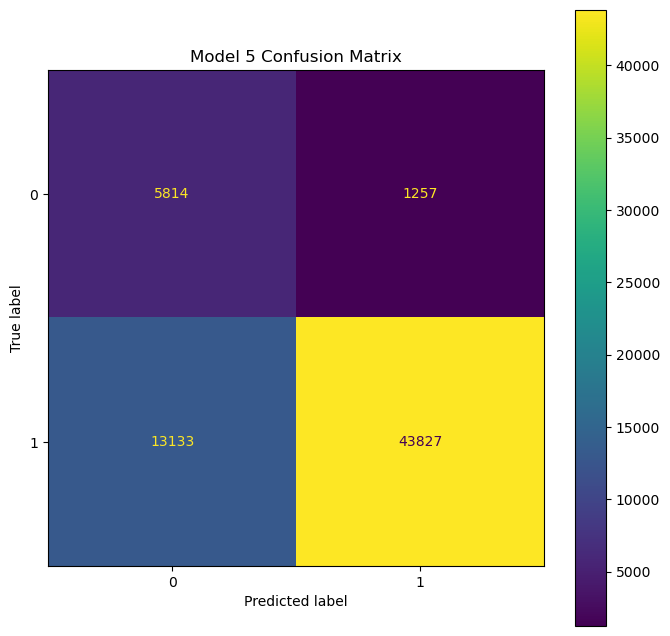

In [53]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title("Model 5 Confusion Matrix")
plot_confusion_matrix(pipe5, X_test, y_test, ax = ax)
plt.show();

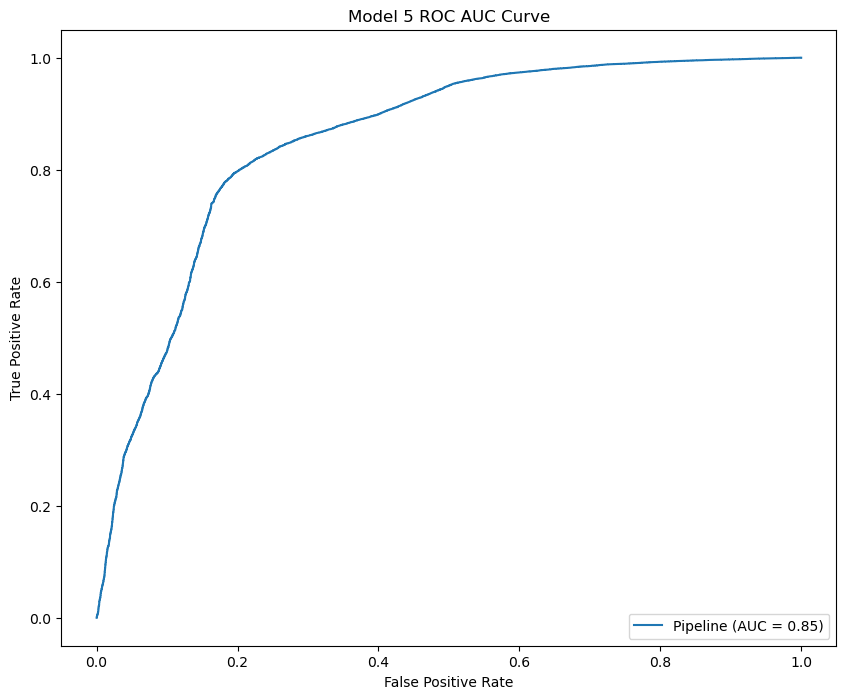

In [54]:
# plotting the AUC Curve 

fig, ax = plt.subplots(figsize = (10, 8))
plot_roc_curve(pipe5, X_test, y_test, ax = ax)
ax.set_title("Model 5 ROC AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show();

## Feature Importances